# Neural Net from Scratch
Source code inspired from Medium article by [Koushik](https://medium.com/@koushikkushal95/logistic-regression-from-scratch-dfb8527a4226#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6ImFjM2UzZTU1ODExMWM3YzdhNzVjNWI2NTEzNGQyMmY2M2VlMDA2ZDAiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJhenAiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJhdWQiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJzdWIiOiIxMTUzMzU3MDA2ODM3MjU3NDUwMjIiLCJlbWFpbCI6Im10a2FsaXNoQGdtYWlsLmNvbSIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJuYmYiOjE3MTQ5NTA0OTMsIm5hbWUiOiJNaWNoYWVsIEthbGlzaCIsInBpY3R1cmUiOiJodHRwczovL2xoMy5nb29nbGV1c2VyY29udGVudC5jb20vYS9BQ2c4b2NJQUxKa0dPZkwtVzJjb3R2ejJQSW1yMzNkc1BKeVo2ZlNaS0NUTUdad1JSNUtvS2RJPXM5Ni1jIiwiZ2l2ZW5fbmFtZSI6Ik1pY2hhZWwiLCJmYW1pbHlfbmFtZSI6IkthbGlzaCIsImlhdCI6MTcxNDk1MDc5MywiZXhwIjoxNzE0OTU0MzkzLCJqdGkiOiI4NGM0MzMwMzljODBhZTNjNjE2YmY3NGQ3OGIzNDY0Y2RkN2YzY2Y4In0.njudRFk-Sz_AgH1owe-noHRdWzkoKXcxM_eWIDegKDuePvjlMg-wzwjO07zVj_Kp_sD6XTLexuoxUY-5G00O5ec2XLK_kjVGokSFvOB9S4QINy5ApI-_kk7P-BABdTytmYsMzqDclUaV-6wBDr3BKE5W9NW9YEWGtddpy2HJi_d1I1ZCutvrlwDgeGzaQLgC-UUiSATzEZC76-CPXDg_sTi25MPiqjya2_GyVhb6mEt64Q2BNJynvkfHrmutWe4bQOy-Kndq7941nY8jWh6VNkKZ5ZVuU-5HzyG3HLMWc9oF6ATqN9ppildD-FPRtD892P2zFdmzklbf02OMtBCcGg)

In [3]:
# Data handling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data and pre-processing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix

In [4]:
# Load dataset
dataset = datasets.load_breast_cancer()

# Define data and target
X, y = dataset.data, dataset.target 

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
{'X: (455, 30)',
 'dw flattened: (30,)',
 'dw: (30, 1)',
 'dz: (455, 1)',
 'logits reshaped: (455, 1)',
 'logits: (455,)',
 'weights: (30,)',
 'y reshaped: (455, 1)',
 'y: (455,)'}

In [5]:
class NeuralNet:
    def __init__(self, learning_rate=0.001, n_iters=1000, n_hidden=10, dropout_rate=0.5):
        self.lr = learning_rate
        self.n_iters = n_iters # Epochs
        self.n_hidden = n_hidden  # Number of neurons in the hidden layer
        self.dropout_rate = dropout_rate 
        self.weights1 = None  # Hidden layer
        self.bias1 = None
        self.weights2 = None  # Output layer
        self.bias2 = None
        self.losses = []
        self.val_losses = []

    def _relu(self, x):
        return np.maximum(0, x)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def _dropout(self, activations):
        # During training, drop random neurons
        self.mask = (np.random.rand(*activations.shape) > self.dropout_rate).astype(int)
        return activations * self.mask

    def compute_loss(self, y_true, y_pred):
        # Binary cross entropy
        epsilon = 1e-9
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Avoid log(0)
        y1 = y_true * np.log(y_pred)
        y2 = (1 - y_true) * np.log(1 - y_pred)
        return -np.mean(y1 + y2)

    def feed_forward(self, X, training=False):
        # Hidden layer
        z1 = np.dot(X, self.weights1) + self.bias1
        a1 = self._relu(z1)
        if training:
            a1 = self._dropout(a1) 
        # Output layer
        z2 = np.dot(a1, self.weights2) + self.bias2
        a2 = self._sigmoid(z2)
        return a1, a2

    def fit(self, X, y, X_val=None, y_val=None):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)  # Ensure y is a column vector
        self.weights1 = np.random.randn(n_features, self.n_hidden) * np.sqrt(2. / n_features)
        self.bias1 = np.zeros(self.n_hidden)
        self.weights2 = np.random.randn(self.n_hidden, 1) * np.sqrt(2. / self.n_hidden)
        self.bias2 = 0

        for _ in range(self.n_iters):
            a1, a2 = self.feed_forward(X, training=True)
            loss = self.compute_loss(y, a2)
            self.losses.append(loss)

            if X_val is not None and y_val is not None:
                _, a2_val = self.feed_forward(X_val)
                val_loss = self.compute_loss(y_val, a2_val)
                self.val_losses.append(val_loss)

            # Backpropagation
            dz2 = a2 - y
            dw2 = np.dot(a1.T, dz2) / n_samples
            db2 = np.sum(dz2, axis=0, keepdims=True) / n_samples

            da1 = np.dot(dz2, self.weights2.T)
            da1 *= self.mask 
            dz1 = da1 * (a1 > 0)
            dw1 = np.dot(X.T, dz1) / n_samples
            db1 = np.sum(dz1, axis=0, keepdims=True) / n_samples

            self.weights1 -= self.lr * dw1
            self.bias1 -= self.lr * db1.squeeze()
            self.weights2 -= self.lr * dw2
            self.bias2 -= self.lr * db2.squeeze()

    def predict_proba(self, X):
        _, a2 = self.feed_forward(X)
        y_prob = a2.flatten()
        return y_prob

    def predict(self, X):
        _, a2 = self.feed_forward(X)  # Use the output from the last layer
        y_predicted_cls = [1 if prob > 0.5 else 0 for prob in a2]
        y_pred = np.array(y_predicted_cls).flatten()
        return y_pred

    def evaluate(self, y_true, y_pred, y_prob, beta=1.2, type="TRAINING"):

        # Calculate results
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        cm  = confusion_matrix(np.asarray(y_true), np.asarray(y_pred))
        auc = roc_auc_score(y_true, y_prob)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        f2 = fbeta_score(y_true, y_pred, beta=beta)

        # Print results
        print(f"{type} PERFORMANCE:")
        print(f"Accuracy: {accuracy:.2f},\nPrecision: {precision:.2f}\nRecall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}\nF2 Score (beta={beta}): {f2:.2f}\nROC AUC: {auc:.2f}")
        print("Confusion Matrix\n",np.array(cm))
        print("Classsification Report\n", classification_report(y_true, y_pred))

        return y_pred, y_prob
    
    def loss_curve(self):
        plt.figure(figsize=(10, 5))
        plt.plot(self.losses, label='Training Loss')
        plt.plot(self.val_losses, label='Validation Loss')
        plt.title('Loss Curve')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()



In [6]:
# Create and train the neural network
hyperparams = {
               'learning_rate' : 0.01,
               'n_iters' : 100,
               'n_hidden' : 20,
               'dropout_rate' : 0.5
               }

# Instantiate model and fit to data
model = NeuralNet(**hyperparams)
model.fit(X_train, y_train, X_test, y_test)

In [7]:
def performance_results(X, y, beta, type):
    """Return performance metrics"""
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)
    y_pred, y_prob = model.evaluate(y, y_pred, y_prob, beta, type)
    
y_pred_test, y_prob_test = performance_results(X_test, y_test, beta=1.2, type="TEST")



TEST PERFORMANCE:
Accuracy: 0.82,
Precision: 0.98
Recall: 0.72
F1 Score: 0.83
F2 Score (beta=1.2): 0.81
ROC AUC: 0.97
Confusion Matrix
 [[42  1]
 [20 51]]
Classsification Report
               precision    recall  f1-score   support

           0       0.68      0.98      0.80        43
           1       0.98      0.72      0.83        71

    accuracy                           0.82       114
   macro avg       0.83      0.85      0.81       114
weighted avg       0.87      0.82      0.82       114



TRAINING PERFORMANCE:
Accuracy: 0.77,
Precision: 0.96
Recall: 0.66
F1 Score: 0.78
F2 Score (beta=1.2): 0.76
ROC AUC: 0.94
Confusion Matrix
 [[161   8]
 [ 97 189]]
Classsification Report
               precision    recall  f1-score   support

           0       0.62      0.95      0.75       169
           1       0.96      0.66      0.78       286

    accuracy                           0.77       455
   macro avg       0.79      0.81      0.77       455
weighted avg       0.83      0.77      0.77       455



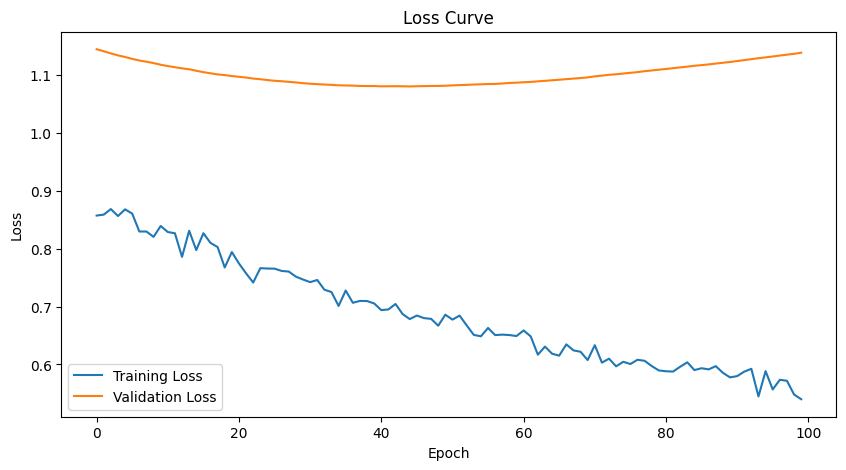

In [8]:
# Get performance results
y_pred_train, y_prob_train = performance_results(X_train, y_train, beta=1.2, type="TRAINING")

# Show loss curve
model.loss_curve()